# TP sur le Titanic

In [ ]:
# Import des bibliothèques
import pandas as pd
import numpy as np

# Chargement des données du Titanic
titanic_data = pd.read_csv('./data/titanic/train.csv')

# Affichage des premières lignes du jeu de données pour voir un aperçu
titanic_data.head()

In [ ]:
# Imprimer la taille des données
print("La taille des données est : ", titanic_data.shape)   

In [ ]:
# Import des bibliothèques nécessaires pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer la carte thermique des valeurs NaN
plt.figure(figsize=(10, 6))  # Taille de la figure
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)  # isnull() crée un masque booléen pour NaN
plt.title("Carte thermique des valeurs NaN dans les données du Titanic")
plt.show()

In [ ]:
# Calculer le pourcentage de valeurs manquantes dans la colonne 'Age'
age_nan_percentage = titanic_data['Age'].isna().mean() * 100

print(f"Le pourcentage des valeurs manquantes dans la colonne 'Age' est de : {age_nan_percentage:.2f}%")

In [ ]:
# Importer les bibliothèques nécessaires pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer l'histogramme de la colonne 'Age' et ajouter une courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), kde=True, color='blue', bins=30)

plt.title('Distribution de l\'âge avec la courbe de densité', fontsize=16)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()

In [ ]:
# Calculer la moyenne et la médiane de la colonne 'Age'
mean_age = titanic_data['Age'].mean()
median_age = titanic_data['Age'].median()

print(f'Moyenne de l\'âge: {mean_age:.2f}')
print(f'Médiane de l\'âge: {median_age:.2f}')

In [ ]:
# Calculer le pourcentage de valeurs NaN dans la colonne 'Cabin'
cabin_nan_percentage = titanic_data['Cabin'].isna().mean() * 100

print(f'Pourcentage des valeurs NaN dans la colonne "Cabin": {cabin_nan_percentage:.2f}%')

In [ ]:
# Importer la bibliothèque pour le tracé
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer la distribution de la colonne 'Embarked'
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Embarked', palette='Set2')

plt.title('Distribution des passagers par port d\'embarquement', fontsize=14)
plt.xlabel('Port d\'embarquement', fontsize=12)
plt.ylabel('Nombre de passagers', fontsize=12)
plt.show()

In [ ]:
# Appliquer le prétraitement
# Imputation des valeurs manquantes

# Imputer la colonne 'Age' avec la médiane (28 dans ce cas)
titanic_data['Age'].fillna(28, inplace=True)

# Imputer la colonne 'Embarked' avec le mode (valeur la plus fréquente) - ici 'S'
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Ignorer la colonne 'Cabin' car elle a trop de valeurs manquantes
titanic_data.drop('Cabin', axis=1, inplace=True)

# Vérifier les résultats après imputation
# Afficher le pourcentage de valeurs NaN restantes pour chaque colonne
nan_percentages = titanic_data.isnull().mean() * 100
print("Pourcentage de valeurs manquantes dans chaque colonne après prétraitement :")
print(nan_percentages)

# Afficher les premières lignes du dataset pour voir les modifications
print("\nAperçu des premières lignes du dataset après prétraitement :")
print(titanic_data.head())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Avant le traitement, stocker les valeurs d'âge d'origine pour comparaison
original_age = titanic_data['Age'].copy()

# Appliquer le prétraitement
# Imputer la colonne 'Age' avec la médiane (28 dans ce cas)
titanic_data['Age'].fillna(28, inplace=True)

# Créer un graphique avec deux histogrammes superposés
plt.figure(figsize=(12, 6))

# Histogramme avant traitement (original)
plt.subplot(1, 2, 1)
sns.histplot(original_age, kde=True, color='blue', stat='density', bins=30)
plt.title('Histogramme de Age Avant Traitement')
plt.xlabel('Âge')
plt.ylabel('Densité')

# Histogramme après traitement
plt.subplot(1, 2, 2)
sns.histplot(titanic_data['Age'], kde=True, color='red', stat='density', bins=30)
plt.title('Histogramme de Age Après Traitement')
plt.xlabel('Âge')
plt.ylabel('Densité')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [ ]:
# Créer la fonctionnalité "TravelAlone"
titanic_data['TravelAlone'] = (titanic_data['SibSp'] + titanic_data['Parch'] == 0).astype(int)

# Vérifier les premiers enregistrements pour voir le résultat
print(titanic_data.head())

In [ ]:
import pandas as pd

# Sélectionner les colonnes nécessaires pour l'encodage
df = titanic_data[['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare', 'TravelAlone', 'Pclass', 'Embarked', 'Sex']]

# Créer des variables dummy pour les colonnes catégorielles
df_encoded = pd.get_dummies(df, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)

print(df_encoded.head())

In [ ]:
# Supprimer les colonnes non nécessaires
df_encoded_cleaned = df_encoded.drop(columns=['PassengerId', 'Name', 'Ticket'])

print(df_encoded_cleaned.head())

In [ ]:
import pandas as pd
import numpy as np

# Chargement des données de test
test_df = pd.read_csv('./data/titanic/test.csv')

# Imputation des valeurs manquantes
# Remplir l'âge manquant par la médiane de l'âge
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Remplir les valeurs manquantes de 'Fare' par la médiane, car elle peut aussi influencer le modèle
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Remplir les valeurs manquantes de 'Embarked' par la valeur la plus fréquente
test_df['Embarked'].fillna('S', inplace=True)

# Création de la colonne "TravelAlone" (Voyager seul)
test_df['TravelAlone'] = np.where((test_df['SibSp'] + test_df['Parch']) == 0, 1, 0)

# Encodage des variables catégorielles
test_df_encoded = pd.get_dummies(test_df, columns=['Pclass', 'Embarked', 'Sex'], drop_first=True)

# Suppression des colonnes non nécessaires
test_df_final = test_df_encoded.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'])

print(test_df_final.head())

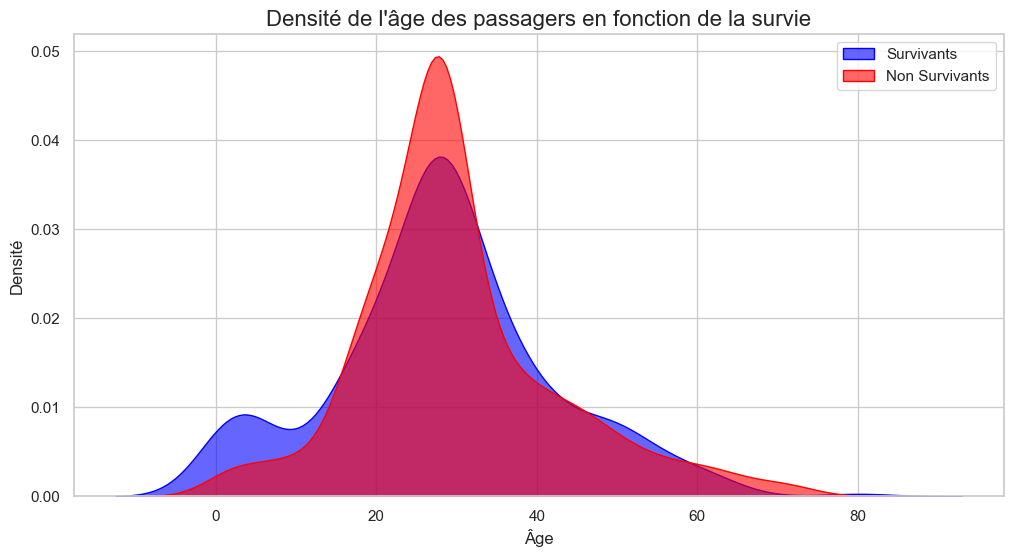

In [19]:
# Importer les bibliothèques nécessaires pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Paramètres pour une meilleure visualisation
plt.figure(figsize=(12, 6))

# Distribution d'âge pour les passagers qui ont survécu
sns.kdeplot(data=titanic_data[titanic_data['Survived'] == 1], x="Age", fill=True, label="Survivants", color="blue", alpha=0.6)

# Distribution d'âge pour les passagers qui n'ont pas survécu
sns.kdeplot(data=titanic_data[titanic_data['Survived'] == 0], x="Age", fill=True, label="Non Survivants", color="red", alpha=0.6)

# Ajouter des titres et des légendes
plt.title("Densité de l'âge des passagers en fonction de la survie", fontsize=16)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Densité", fontsize=12)
plt.legend()

# Afficher le graphique
plt.show()


In [ ]:
# Ajouter la colonne 'IsMinor' en fonction de la colonne 'Age'
titanic_data['IsMinor'] = (titanic_data['Age'] < 16).astype(int)

    Age  IsMinor
0  22.0        0
1  38.0        0
2  26.0        0
3  35.0        0
4  35.0        0


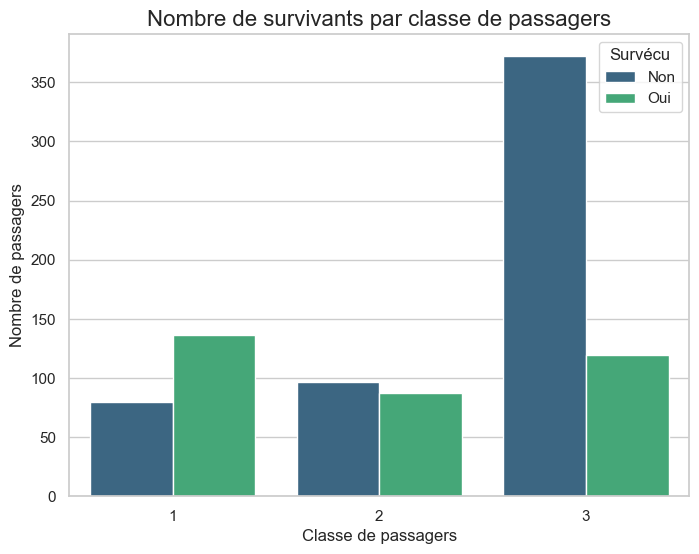

In [ ]:
# Importer les bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un graphique montrant le nombre de survivants par classe
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Pclass', hue='Survived', palette='viridis')

# Ajouter un titre et des labels
plt.title("Nombre de survivants par classe de passagers", fontsize=16)
plt.xlabel("Classe de passagers", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

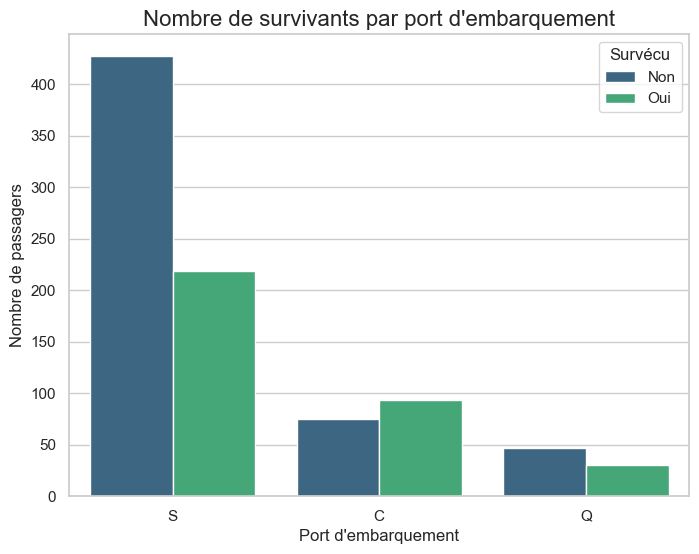

In [ ]:
# Créer un graphique montrant le nombre de survivants par port d'embarquement
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Embarked', hue='Survived', palette='viridis')

# Ajouter un titre et des labels
plt.title("Nombre de survivants par port d'embarquement", fontsize=16)
plt.xlabel("Port d'embarquement", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

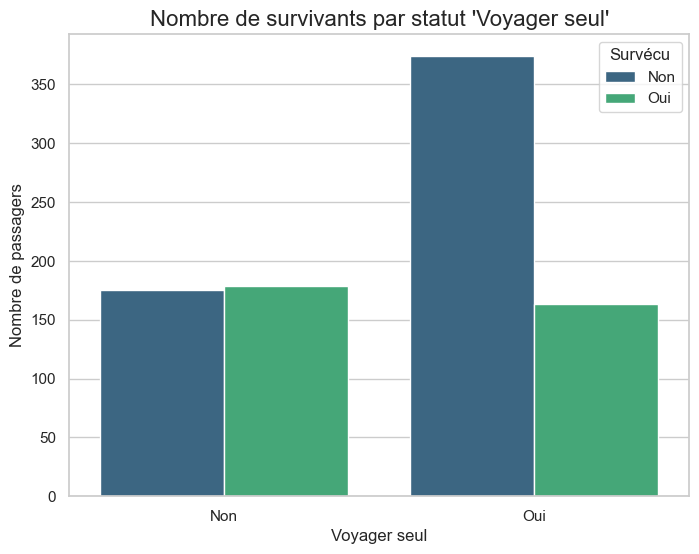

In [ ]:
# Créer un graphique montrant le nombre de survivants par "Voyager seul"
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='TravelAlone', hue='Survived', palette='viridis')

# Ajouter un titre et des labels
plt.title("Nombre de survivants par statut 'Voyager seul'", fontsize=16)
plt.xlabel("Voyager seul", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.xticks([0, 1], ['Non', 'Oui'])  # Modifier les labels de l'axe x
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

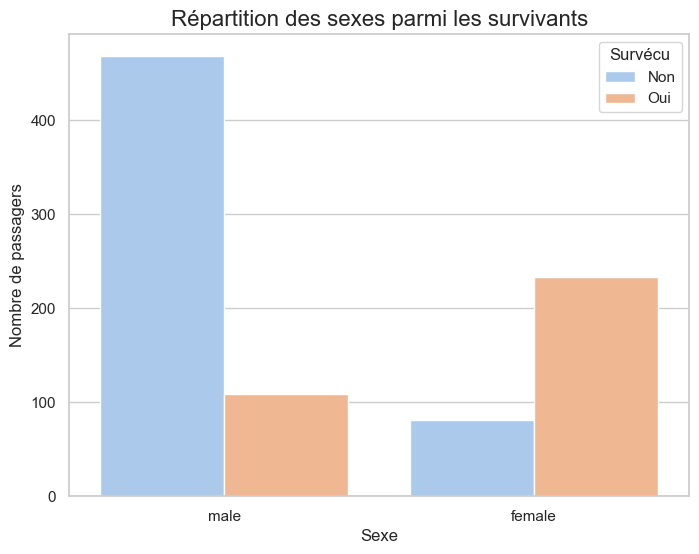

In [28]:
# Créer un graphique montrant la répartition des sexes parmi les survivants
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Sex', hue='Survived', palette='pastel')

# Ajouter un titre et des labels
plt.title("Répartition des sexes parmi les survivants", fontsize=16)
plt.xlabel("Sexe", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()